<a href="https://colab.research.google.com/github/VV1102/Cartomancy/blob/main/InteriorDesignModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade diffusers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 737.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.7 MB/s eta 0:00:00


In [ ]:
!pip install pillow requests tqdm

In [ ]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import cv2
import requests
from PIL import Image
from io import BytesIO

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400, 400)
    image_gen_guidance_scale = 9
    prompt_max_length = 30  # Increased prompt length to 30 words


RuntimeError: CUDA error: CUDA driver version is insufficient for CUDA runtime version
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Device-side assertions were explicitly omitted for this error check; the error probably arose while initializing the DSA handlers.

In [ ]:
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [ ]:

image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16, revision="fp16"
)
image_gen_model = image_gen_model.to(CFG.device)

NameError: name 'CFG' is not defined

In [ ]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

In [ ]:
dataset_url = 'https://datasets-server.huggingface.co/assets/victorzarzu/interior-design-prompt-editing-dataset-test/--/edf4c29b75b721d45c2ccede28178829e7202aa1/--/default/train/0/original_image/image.jpg?Expires=1724745992&Signature=NNfi46D9zs5~x6vRdwU7uwbULQhlaq99jd9UGmOgGp1tzRlS88L9Fs9qq4DWQUQXOeLujwi9WBsTVHCxe-MkYKtswuRYiD93dUJ2b8qw53ON4AsC0iJpHjG-lgUOeH3dhZhWkigV~BvrTu6yMdFyO782G1TtcfLD4KBxIOytaAo3Y3rfCT-avlnXAkWC8s2Y9gd586MTgDyBgsm8o~Dia4R4sGjKRq1UF2Y-k0VzBRONqHhudF1HzxaKShmOa9Y3o4MMWlbZrATCUt-E2XnzHj467EWc8Qhxw1FWqf2-I8cV1fr36g7Ivy3QKNQuT~QnOP9J4LT-RHunHQhD5Z5Csw__&Key-Pair-Id=K3EI6M078Z3AC3'  # Replace with your dataset path if local

In [ ]:
df = pd.DataFrame({
    'original_image': [dataset_url],
    'input_prompt': ["A traditional bathroom with a shower-tub combo, a toilet, and a vanity that has a brightly colored bathmat on the floor."],
    'edit_prompt': ["Replace the brightly colored bathmat with a neutral-toned one."],
    'output_prompt': ["A traditional bathroom with a shower-tub combo, a toilet, and a vanity with a neutral-toned bathmat on the floor."],
    'designed_image': [dataset_url]
})

In [ ]:
df['original_image'] = df['original_image'].apply(load_image_from_url)
df['designed_image'] = df['designed_image'].apply(load_image_from_url)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e8726d6e250>

  0%|          | 0/35 [00:00<?, ?it/s]

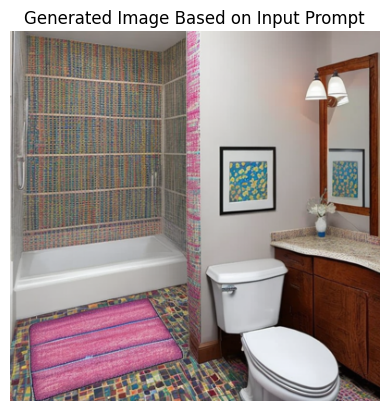

In [ ]:
generated_image = generate_image(df['input_prompt'][0], image_gen_model)
plt.imshow(generated_image)
plt.title("Generated Image Based on Input Prompt")
plt.axis('off')
plt.show()


In [ ]:
def edit_image(image, edit_prompt, model):
    # Generate the edited image
    edited_image = generate_image(edit_prompt, model)

    # Display the edited image
    plt.imshow(edited_image)
    plt.title("Edited Image")
    plt.axis('off')
    plt.show()

    return edited_image


  0%|          | 0/35 [00:00<?, ?it/s]

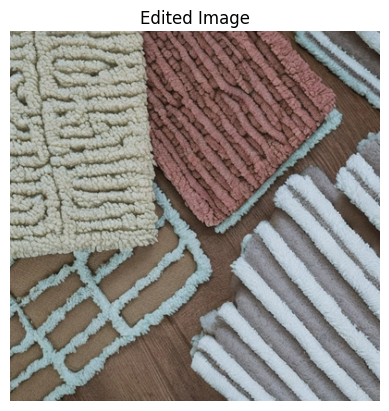

In [ ]:
edited_image = edit_image(generated_image, df['edit_prompt'][0], image_gen_model)


In [ ]:
def save_final_image(image, file_path):
    image.save(file_path)

# Reset Dashboard Function
def reset_dashboard():
    # Code to reset your UI or dashboard goes here
    print("Dashboard reset to initial state.")

In [ ]:
while True:
    user_input = input("Enter an edit prompt (or type 'done' to finish editing): ")
    if user_input.lower() == 'done':
        break
    edited_image = edit_image(edited_image, user_input, image_gen_model)

KeyboardInterrupt: Interrupted by user

In [ ]:
save_final_image(edited_image, 'final_design.jpg')
print("Final design saved as 'final_design.jpg'.")

Final design saved as 'final_design.jpg'.


In [ ]:
reset_dashboard()

Dashboard reset to initial state.


  0%|          | 0/35 [00:00<?, ?it/s]

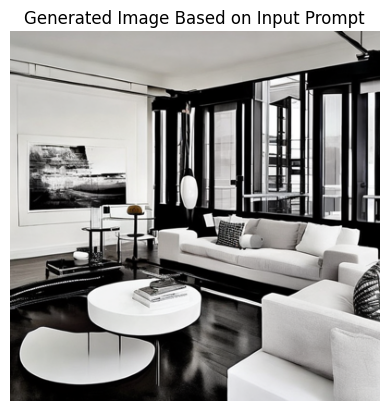

In [ ]:
generated_image = generate_image("penthouse living room with a modern black and white chic look", image_gen_model)
plt.imshow(generated_image)
plt.title("Generated Image Based on Input Prompt")
plt.axis('off')
plt.show()

In [ ]:
def edit_image(image, edit_prompt, model):
    # Generate the edited image
    edited_image = generate_image(edit_prompt, model)

    # Display the edited image
    plt.imshow(edited_image)
    plt.title("Edited Image")
    plt.axis('off')
    plt.show()

    return edited_image

In [ ]:
edited_image = edit_image(generated_image, "make the room more spacious.the outside should have blue skies and the sunlight should be falling in", image_gen_model)

NameError: name 'edit_image' is not defined

Enter an edit prompt (or type 'done' to finish editing): everything stays the same just i want less trees outside


  0%|          | 0/35 [00:00<?, ?it/s]

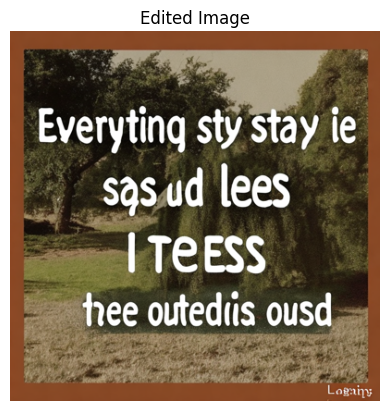

Enter an edit prompt (or type 'done' to finish editing): no words 


In [ ]:
while True:
    user_input = input("Enter an edit prompt (or type 'done' to finish editing): ")
    if user_input.lower() == 'done':
        break
    edited_image = edit_image(edited_image, user_input, image_gen_model)